### Importing libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [ ]:
keras.__version__

'2.4.3'

In [ ]:
training_data_path = "/content/drive/My Drive/Colab Notebooks/cotton_leaf_disease_dataset/train" #training_dataset
validation_data_path = "/content/drive/My Drive/Colab Notebooks/cotton_leaf_disease_dataset/val" #validation_dataset

### Image preprocessing and loading

In [ ]:
training_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

training_data = training_datagen.flow_from_directory(
        training_data_path,
        target_size=(150, 150),
        batch_size=32,
        class_mode='binary')

Found 1950 images belonging to 4 classes.


In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255)
 
# this is a similar generator, for validation data
valid_data = valid_datagen.flow_from_directory(validation_data_path,
                                  target_size=(150,150),
                                  batch_size=32,
                                  class_mode='binary')

Found 324 images belonging to 4 classes.


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20, 20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

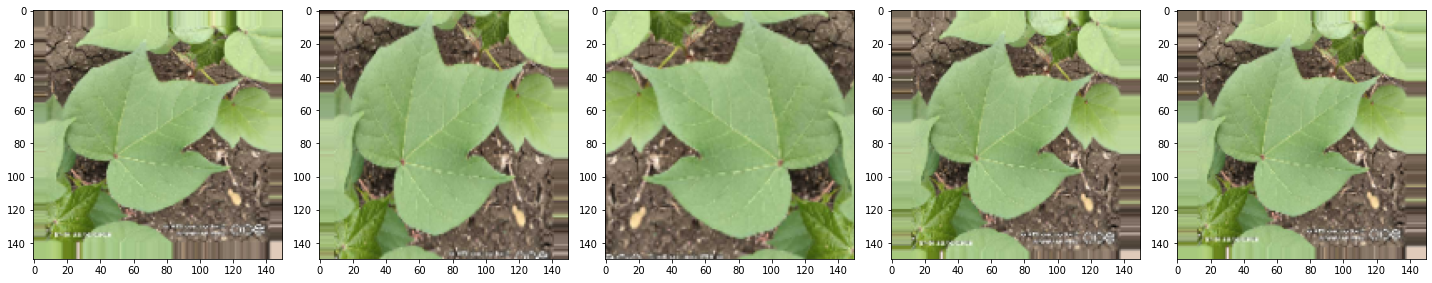

In [ ]:
images = [training_data[0][0][0] for i in range(5)]
plotImages(images)

In [ ]:
model_path = '/content/drive/My Drive/Colab Notebooks/models/cotton_plant_cnn_model.h5'
checkpoint = ModelCheckpoint(model_path, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [ ]:
##Building CNN
cnn_model = keras.models.Sequential([
                                    keras.layers.Conv2D(filters=32, kernel_size=3, input_shape=[150, 150, 3]),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=64, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
                                    keras.layers.Conv2D(filters=128, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),                                    
                                    keras.layers.Conv2D(filters=256, kernel_size=3),
                                    keras.layers.MaxPooling2D(pool_size=(2,2)),
 
                                    keras.layers.Dropout(0.5),                                                                        
                                    keras.layers.Flatten(), 
                                    keras.layers.Dense(units=128, activation='relu'), # input layers
                                    keras.layers.Dropout(0.1),                                    
                                    keras.layers.Dense(units=256, activation='relu'),                                    
                                    keras.layers.Dropout(0.25),                                    
                                    keras.layers.Dense(units=4, activation='softmax') # output layer
])

# compile cnn model
cnn_model.compile(optimizer = Adam(lr=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

In [ ]:
# train cnn model
history = cnn_model.fit(training_data, 
                          epochs=100, 
                          verbose=1, 
                          validation_data= valid_data,
                          callbacks=callbacks_list) # time start 16.06

Epoch 1/100
61/61 [==============================] - ETA: 0s - loss: 1.2014 - accuracy: 0.4841
Epoch 00001: val_accuracy improved from -inf to 0.52160, saving model to /content/drive/My Drive/Colab Notebooks/models/cotton_plant_cnn_model.h5
61/61 [==============================] - 562s 9s/step - loss: 1.2014 - accuracy: 0.4841 - val_loss: 1.0480 - val_accuracy: 0.5216
Epoch 2/100
61/61 [==============================] - ETA: 0s - loss: 0.9370 - accuracy: 0.6205
Epoch 00002: val_accuracy improved from 0.52160 to 0.67284, saving model to /content/drive/My Drive/Colab Notebooks/models/cotton_plant_cnn_model.h5
61/61 [==============================] - 25s 418ms/step - loss: 0.9370 - accuracy: 0.6205 - val_loss: 0.8201 - val_accuracy: 0.6728
Epoch 3/100
61/61 [==============================] - ETA: 0s - loss: 0.7677 - accuracy: 0.7010
Epoch 00003: val_accuracy improved from 0.67284 to 0.73148, saving model to /content/drive/My Drive/Colab Notebooks/models/cotton_plant_cnn_model.h5
61/61 [==

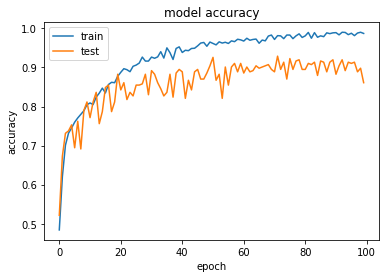

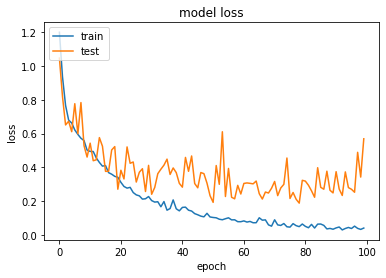

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
import keras
model = keras.models.load_model('/content/drive/My Drive/Colab Notebooks/models/cotton_plant_cnn_model.h5')

In [ ]:
def plot_Image(image_array):
  fig, axes = plt.subplots(1,5, figsize = (20,20))
  a
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()

Given Image:


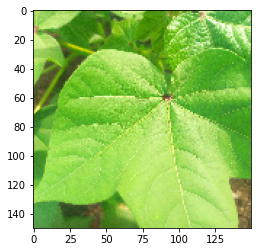

Prediction : 
Fresh Cotton leaf


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/Colab Notebooks/cotton_leaf_disease_dataset/test/fresh cotton leaf/d (366).jpg', target_size = (150, 150))
print("Given Image:")
plt.imshow(test_image)
plt.show()
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)
print('Prediction : ')
training_data.class_indices
if result[0][0] == 1:
  print("Diseased cotton leaf")
  
if result[0][1] == 1:
  print("Diseased cotton plant")
  
if result[0][2] == 1:
  print("Fresh Cotton leaf")
  
if result[0][3] == 1:
  print("Fresh Cotton plant")